In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('iris-data.csv')

In [3]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [5]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.shape

(150, 5)

In [7]:
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [20]:
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [21]:
data= data.dropna(axis=0, subset=['petal_width_cm'])

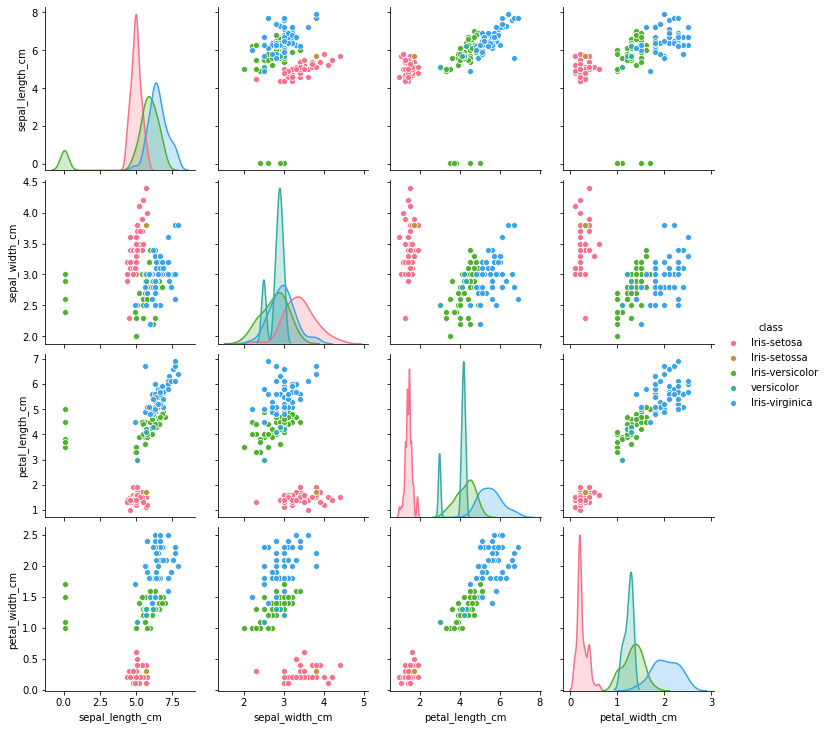

In [25]:
sns.pairplot(data,hue='class')

In [ ]:
#Cleaning Data
#Verifying Outliers 

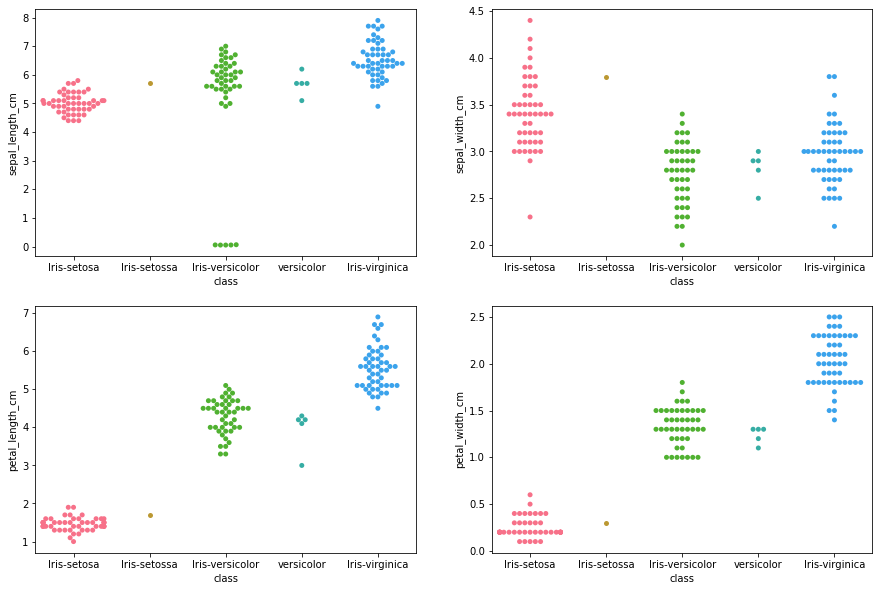

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.swarmplot(x='class',y='sepal_length_cm',data=data)
plt.subplot(2,2,2)
sns.swarmplot(x='class',y='sepal_width_cm',data=data)
plt.subplot(2,2,3)
sns.swarmplot(x='class',y='petal_length_cm',data=data)
plt.subplot(2,2,4)
sns.swarmplot(x='class',y='petal_width_cm',data=data)

In [30]:
#Cleaning Outliers 
def drop_outliers(df, field, threshold=.5):
    df[field+'_rank'] = df[field].rank(pct=True)
    df = df[
        (df[field+'_rank'].ge(threshold)) &
        (df[field+'_rank'].le(1-threshold))]
    df.drop(field+'_rank', axis=1, inplace=True)
    return df.reset_index()

In [31]:
drop_outliers(data,'sepal_length_cm')
drop_outliers(data,'sepal_width_cm')
drop_outliers(data,'petal_length_cm')
drop_outliers(data,'petal_width_cm')


,index,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,sepal_length_cm_rank,sepal_width_cm_rank,petal_length_cm_rank


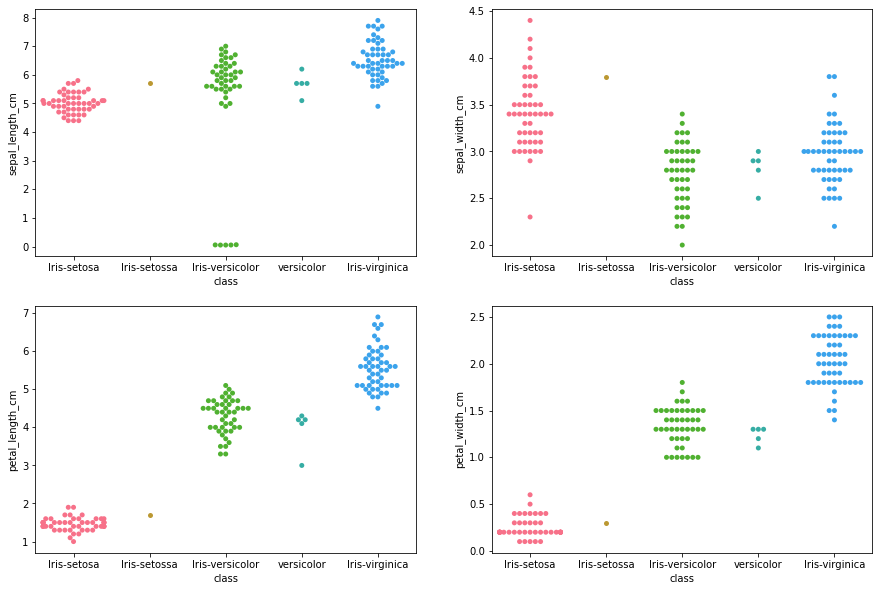

In [32]:
#Plotting Again after eliminating Outliers 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.swarmplot(x='class',y='sepal_length_cm',data=data)
plt.subplot(2,2,2)
sns.swarmplot(x='class',y='sepal_width_cm',data=data)
plt.subplot(2,2,3)
sns.swarmplot(x='class',y='petal_length_cm',data=data)
plt.subplot(2,2,4)
sns.swarmplot(x='class',y='petal_width_cm',data=data)

In [33]:
data.shape

(150, 9)

In [34]:
data.to_csv('final_out.csv', index=False) 